# <a id='toc1_'></a>[$$Day-10-Assignment$$](#toc0_)

---

## **Table of contents**<a id='toc0_'></a>    
### [$$Day-10-Assignment$$](#toc1_)    
  - [Required Libraries](#toc1_1_)    
  - [Creating sample data](#toc1_2_)    
  - [Task 1: Apriori Algorithm Implementation](#toc1_3_)    
    - [Implement Apriori algorithm](#toc1_3_1_)    
    - [Extract frequent itemsets and association rules using the Apriori algorithm.](#toc1_3_2_)    
    - [Significance](#toc1_3_3_)    
      - [significance of support, confidence, and lift](#toc1_3_3_1_)    
  - [Task 2: FP Growth Implementation](#toc1_4_)    
      - [Implement the FP Growth algorithm](#toc1_4_1_1_)    
        - [Frequent Itemset](#toc1_4_1_1_1_)    
        - [Extract association rules](#toc1_4_1_1_2_)    
      - [Compare the performance](#toc1_4_1_2_)    
  - [Task 3: Market Basket Analysis](#toc1_5_)    
    - [Perform market basket analysis on the transaction dataset to identify interesting patterns](#toc1_5_1_)    
    - [Visualize the association rules and interpret the results.](#toc1_5_2_)    
    - [business applications and benefits](#toc1_5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>[Required Libraries](#toc0_)

In [1]:
# Import necessary libraries
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth
import networkx as nx
import matplotlib.pyplot as plt

---

## <a id='toc1_2_'></a>[Creating sample data](#toc0_)

In [2]:
# Create the transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'diapers'],
    ['bread', 'butter'],
    ['bread', 'diapers']
]

# Convert the transaction data into a DataFrame suitable for Apriori
def create_transaction_dataframe(transactions):
    # Create a set of unique items
    items = set(item for transaction in transactions for item in transaction)
    # Create a DataFrame with columns for each item
    transaction_data = []
    for transaction in transactions:
        transaction_data.append({item: (item in transaction) for item in items})
    return pd.DataFrame(transaction_data)

transaction_df = create_transaction_dataframe(transactions)

transaction_df

,milk,butter,bread,diapers
0,True,True,True,False
1,True,False,True,False
2,True,False,False,True
3,False,True,True,False
4,False,False,True,True


---

## <a id='toc1_3_'></a>[Task 1: Apriori Algorithm Implementation](#toc0_)

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_3_1_'></a>[Implement Apriori algorithm](#toc0_)

In [3]:
# Implement Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.2, use_colnames=True)

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_3_2_'></a>[Extract frequent itemsets and association rules using the Apriori algorithm.](#toc0_)

In [4]:
# Display frequent itemsets
print("Frequent Itemsets:")
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.6,(milk)
1,0.4,(butter)
2,0.8,(bread)
3,0.4,(diapers)
4,0.2,"(milk, butter)"
5,0.4,"(milk, bread)"
6,0.2,"(milk, diapers)"
7,0.4,"(butter, bread)"
8,0.2,"(bread, diapers)"
9,0.2,"(milk, butter, bread)"


...........................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
# Extract association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
# Display association rules

print("\nAssociation Rules:")
association_rules_df


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(milk),(bread),0.6,0.8,0.4,0.666667,0.833333,-0.08,0.6,-0.333333
1,(butter),(bread),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333
2,"(milk, butter)",(bread),0.2,0.8,0.2,1.000000,1.250000,0.04,inf,0.250000


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_3_3_'></a>[Significance](#toc0_)

#### <a id='toc1_3_3_1_'></a>[significance of support, confidence, and lift](#toc0_)
- Support is the proportion of transactions that contain the itemset.
- Confidence is the likelihood of the consequent given the antecedent.
- Lift indicates the strength of the rule over random chance.

----

## <a id='toc1_4_'></a>[Task 2: FP Growth Implementation](#toc0_)

...........................................................................................................................................................................................................................................................................................................................................................................................

#### <a id='toc1_4_1_1_'></a>[Implement the FP Growth algorithm](#toc0_)

In [6]:
# Implement FP Growth algorithm to find frequent itemsets
frequent_itemsets_fp = fpgrowth(transaction_df, min_support=0.2, use_colnames=True)

...........................................................................................................................................................................................................................................................................................................................................................................................

##### <a id='toc1_4_1_1_1_'></a>[Frequent Itemset](#toc0_)

In [7]:
# Display frequent itemsets from FP Growth
print("Frequent Itemsets using FP Growth:")
print(frequent_itemsets_fp)


Frequent Itemsets using FP Growth:
   support               itemsets
0      0.8                (bread)
1      0.6                 (milk)
2      0.4               (butter)
3      0.4              (diapers)
4      0.4          (milk, bread)
5      0.4        (butter, bread)
6      0.2         (milk, butter)
7      0.2  (milk, butter, bread)
8      0.2        (milk, diapers)
9      0.2       (bread, diapers)


...........................................................................................................................................................................................................................................................................................................................................................................................

##### <a id='toc1_4_1_1_2_'></a>[Extract association rules](#toc0_)

In [8]:

association_rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.6)

#Display association rules
print("\nAssociation Rules using FP Growth:")
print(association_rules_fp)



Association Rules using FP Growth:
      antecedents consequents  antecedent support  consequent support  \
0          (milk)     (bread)                 0.6                 0.8   
1        (butter)     (bread)                 0.4                 0.8   
2  (milk, butter)     (bread)                 0.2                 0.8   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.4    0.666667  0.833333     -0.08         0.6      -0.333333  
1      0.4    1.000000  1.250000      0.08         inf       0.333333  
2      0.2    1.000000  1.250000      0.04         inf       0.250000  


...........................................................................................................................................................................................................................................................................................................................................................................................

#### <a id='toc1_4_1_2_'></a>[Compare the performance](#toc0_)

In [9]:


import time

start_time_apriori = time.time()
apriori(transaction_df, min_support=0.2, use_colnames=True)
end_time_apriori = time.time()

start_time_fp = time.time()
fpgrowth(transaction_df, min_support=0.2, use_colnames=True)
end_time_fp = time.time()

print("\nApriori Execution Time:", end_time_apriori - start_time_apriori)
print("FP Growth Execution Time:", end_time_fp - start_time_fp)

# Discussing the advantages and disadvantages of FP Growth
print("\nFP Growth is typically faster than Apriori because it uses a more compact data structure.")
print("However, FP Growth can be more complex to implement and understand.")



Apriori Execution Time: 0.004546403884887695
FP Growth Execution Time: 0.0

FP Growth is typically faster than Apriori because it uses a more compact data structure.
However, FP Growth can be more complex to implement and understand.


---

## <a id='toc1_5_'></a>[Task 3: Market Basket Analysis](#toc0_)

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_1_'></a>[Perform market basket analysis on the transaction dataset to identify interesting patterns](#toc0_)

In [10]:
# Perform market basket analysis using Apriori results
market_basket_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_2_'></a>[Visualize the association rules and interpret the results.](#toc0_)

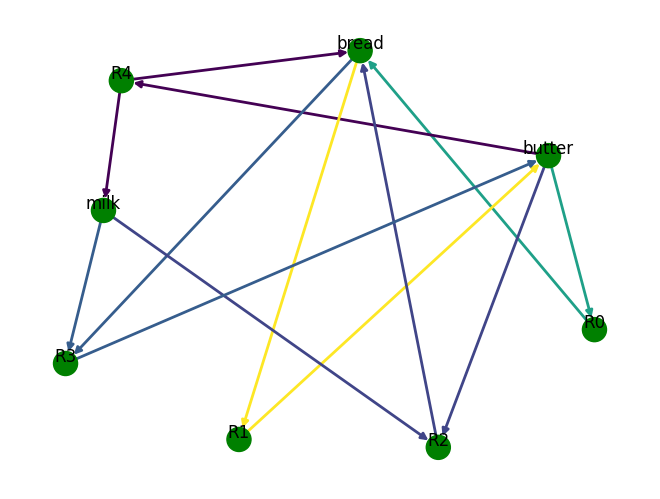

In [11]:
# Create a graph for visualization
def draw_graph(rules, rules_to_show):
    G = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = [str(i) for i in range(50)]
    for i in range(rules_to_show):
        G.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G.add_nodes_from([a])
            G.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G.add_nodes_from([c])
            G.add_edge("R"+str(i), c, color=colors[i], weight=2)
    for node in G:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight'] for u,v in edges]
    pos = nx.spring_layout(G, k=16, scale=2)
    nx.draw(G, pos, edge_color=colors, width=weights, node_color=color_map, with_labels=False)
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G, pos)
    plt.show()

# Visualize top 5 rules
draw_graph(market_basket_rules, 5)


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_3_'></a>[business applications and benefits](#toc0_)
Market basket analysis helps retailers understand product associations.
It can be used for cross-selling, upselling, inventory management, and personalized marketing.

---